# Introdução ao pacote de inversão

## Regressão linear básica

In [1]:
import numpy as np

In [2]:
x = np.linspace(5, 20, 100)
a, b = 0.1, 500
y = a*x + b

In [3]:
type(x)

numpy.ndarray

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

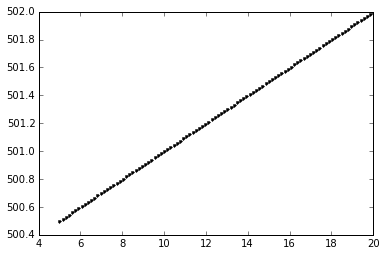

In [5]:
plt.plot(x, y, '.k')

In [4]:
from fatiando import utils

In [7]:
y_real = utils.contaminate(y, 0.2)

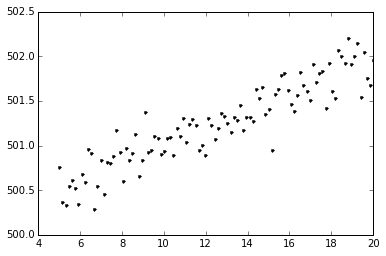

In [8]:
plt.plot(x, y_real, '.k')

In [5]:
from fatiando.inversion import Misfit

In [10]:
class Regressao(Misfit):
    
    def __init__(self, x, y):
        super(Regressao, self).__init__(data=y, nparams=2, islinear=True)
        self.x = x
        
    def predicted(self, p):
        a, b = p
        return a*self.x + b
    
    def jacobian(self, p):
        A = np.empty((self.ndata, self.nparams))
        A[:, 0] = self.x
        A[:, 1] = 1
        return A

In [11]:
reg = Regressao(x, y_real)

In [12]:
reg

In [13]:
reg.fit()

In [14]:
reg.estimate_

array([  9.57974944e-02,   5.00052531e+02])

In [15]:
reg.predicted()

array([ 500.53151879,  500.54603356,  500.56054834,  500.57506311,
        500.58957788,  500.60409265,  500.61860742,  500.6331222 ,
        500.64763697,  500.66215174,  500.67666651,  500.69118128,
        500.70569605,  500.72021083,  500.7347256 ,  500.74924037,
        500.76375514,  500.77826991,  500.79278469,  500.80729946,
        500.82181423,  500.836329  ,  500.85084377,  500.86535855,
        500.87987332,  500.89438809,  500.90890286,  500.92341763,
        500.9379324 ,  500.95244718,  500.96696195,  500.98147672,
        500.99599149,  501.01050626,  501.02502104,  501.03953581,
        501.05405058,  501.06856535,  501.08308012,  501.0975949 ,
        501.11210967,  501.12662444,  501.14113921,  501.15565398,
        501.17016875,  501.18468353,  501.1991983 ,  501.21371307,
        501.22822784,  501.24274261,  501.25725739,  501.27177216,
        501.28628693,  501.3008017 ,  501.31531647,  501.32983125,
        501.34434602,  501.35886079,  501.37337556,  501.38789

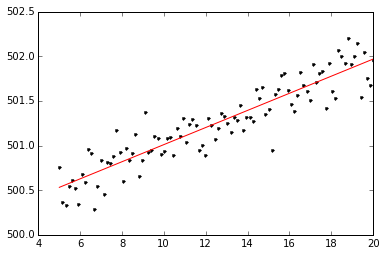

In [16]:
plt.plot(x, y_real, '.k')
plt.plot(x, reg.predicted(), '-r')

## Desafio: Implemente uma classe que faz o ajuste de uma parábola

In [17]:
a, b, c = 0.01, 0.1, 100
y2 = a*x**2 + b*x + c
y2_real = utils.contaminate(y2, 0.1)

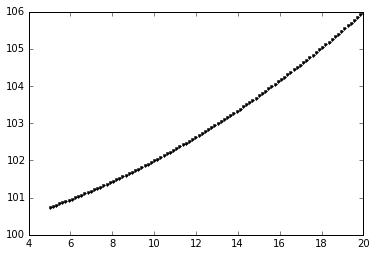

In [18]:
plt.plot(x, y2, '.k')

In [19]:
class Parabola(Misfit):
    
    def __init__(self, x, y):
        super(Parabola, self).__init__(data=y, nparams=3, islinear=False)
        self.x = x
        
    def predicted(self, p):
        a, b, c = p
        return a*self.x**2 + b*self.x + c
    
    def jacobian(self, p):
        A = np.empty((self.ndata, self.nparams))
        A[:, 0] = self.x**2
        A[:, 1] = self.x
        A[:, 2] = 1
        return A

In [20]:
par = Parabola(x, y2_real).fit()
par.estimate_

array([  1.03478593e-02,   9.08641772e-02,   1.00053191e+02])

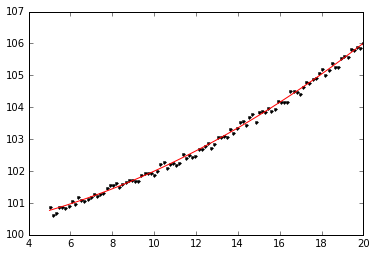

In [21]:
plt.plot(x, y2_real, '.k')
plt.plot(x, par.predicted(), '-r')

## Optimização não-linear

In [22]:
par.config

<bound method Parabola.config of <__main__.Parabola object at 0x7f8589f30ed0>>

In [23]:
par.config('newton', initial=[0, 0, 0])

In [24]:
par.fit()

In [25]:
par.estimate_

array([  1.03477983e-02,   9.08657373e-02,   1.00053182e+02])

In [26]:
par.stats_

{'iterations': 2,
 'method': "Newton's method",
 'objective': [1061215.6883460106, 0.78331964934736065, 0.78331964934735909]}

In [27]:
par.config('acor', bounds=[0, 1, 0, 1, 0, 1000]).fit()

In [28]:
par.estimate_

array([  9.90875119e-03,   1.02991684e-01,   9.99738763e+01])

## Desafio: Inversão não-linear para ajustar uma gaussiana

In [17]:
a, b, c = 100, 0.1, -10
x = np.linspace(0, 20, 100)
y3 = a*np.exp(-b*(x + c)**2)
y3_real = utils.contaminate(y3, 5)

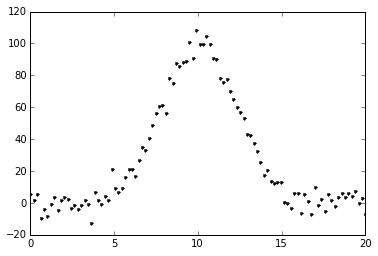

In [18]:
plt.plot(x, y3_real, '.k')

In [72]:
class Gaussian(Misfit):
    
    def __init__(self, x, y):
        super(Gaussian, self).__init__(data=y, nparams=3, islinear=False)
        self.x = x
        
    def predicted(self, p):
        a, b, c = p
        return a*np.exp(-b*(self.x + c)**2)
    
    def jacobian(self, p):
        a, b, c = p                
        A = np.zeros((self.ndata, self.nparams))  
        var = self.x + c 
        exponential = np.exp(-b*var**2) 
        A[:, 0] = exponential
        A[:, 1] = -a*exponential*(var**2)
        A[:, 2] = -a*exponential*2*b*var
        return A

In [73]:
gauss = Gaussian(x, y3_real)

In [77]:
gauss.config('levmarq', initial=[1, 1, -1]).fit()

In [78]:
gauss.estimate_

array([-0.37428301,  4.50189521,  6.46516503])

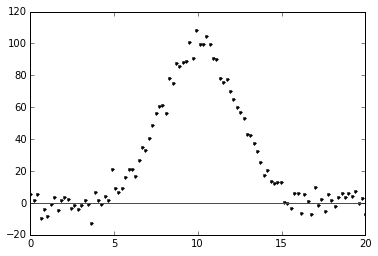

In [80]:
plt.plot(x, y3_real, '.k')
plt.plot(x, gauss.predicted(), '-r')

In [81]:
gauss.config('acor', bounds=[1, 1000, 1e-5, 5, -100, 0]).fit()

In [82]:
gauss.estimate_

array([  1.00183923e+02,   9.99988544e-02,  -1.00629794e+01])

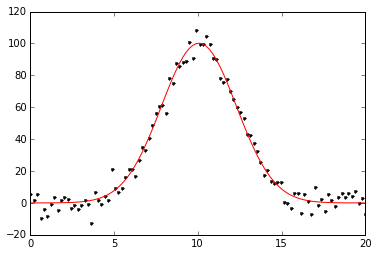

In [83]:
plt.plot(x, y3_real, '.k')
plt.plot(x, gauss.predicted(gauss.p_), '-r')